In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

# Load Boston Housing dataset
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target

# Display the first 5 rows of the dataset
data.head()

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Display summary statistics
summary_statistics = data.describe()

missing_values, summary_statistics

(CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 MEDV       0
 dtype: int64,
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
 std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
 min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
 25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
 50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
 75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
 max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   
 
               AGE         DIS         RAD       

## Exploratory Data Analysis (EDA)
### Ethical Consideration

It is important to address an ethical consideration associated with this dataset. The Boston Housing dataset includes a variable 'B' that is based on the proportion of the population in a neighborhood that is of African American descent. This variable is calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town. Critics argue that using this variable in the dataset and in predictive modeling can reinforce and perpetuate racial biases and inequalities. This has led to discussions about the ethical implications of using this dataset for teaching and research purposes. [Source](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8)

We include this ethical consideration upfront in the 'Exploratory Data Analysis (EDA)' section to ensure that anyone reviewing this notebook is aware of the ethical implications from the beginning and can take them into consideration when interpreting the results.

### Missing Values and Summary Statistics

The dataset does not have any missing values, as indicated by the count of missing values for each column:

```
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
```

Here are the summary statistics of the dataset:

```
              CRIM          ZN       INDUS        CHAS         NOX          RM         AGE         DIS         RAD         TAX     PTRATIO           B       LSTAT        MEDV
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000
 mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   12.653063   22.532806
 std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   28.148861    2.105710    8.707259  168.537116    2.164946   91.294864    7.141062    9.197104
 min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000    2.900000    1.129600    1.000000  187.000000   12.600000    0.320000    1.730000    5.000000
 25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   45.025000    2.100175    4.000000  279.000000   17.400000  375.377500    6.950000   17.025000
 50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   11.360000   21.200000
 75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   16.955000   25.000000
 max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000  100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   37.970000   50.000000
```

Next, let's visualize the data to identify any patterns or correlations. We will create a heatmap of the correlation matrix to visualize the relationships between the features and the target variable (MEDV).

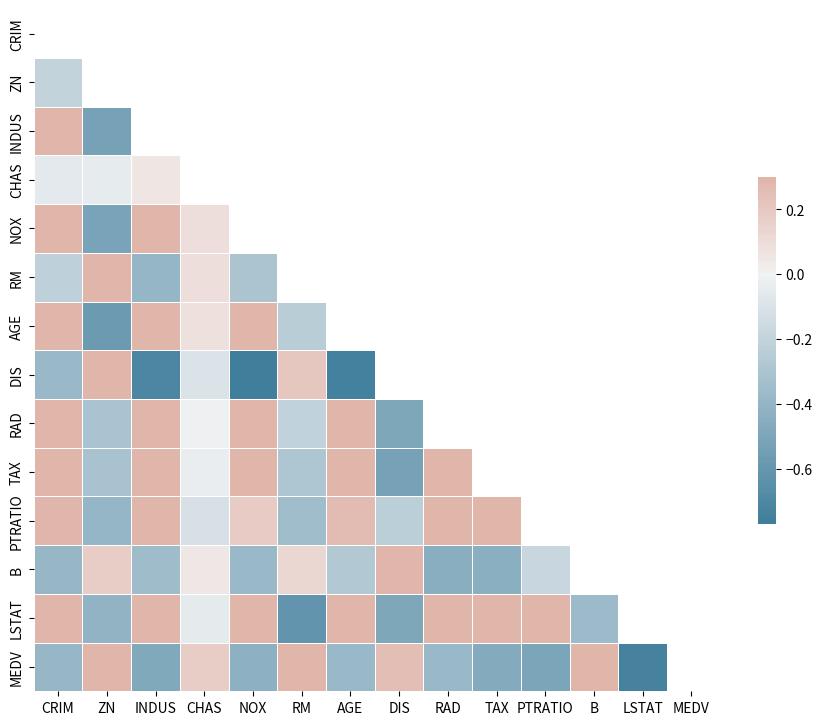

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

The heatmap above shows the correlation between the different features of the Boston Housing dataset. The color palette in the heatmap ranges from light to dark, where light colors indicate low correlation and dark colors indicate high correlation.

From the heatmap, we can observe that the 'RM' feature, which represents the average number of rooms per dwelling, has a strong positive correlation with the target variable 'MEDV' (Median value of owner-occupied homes in $1000's). This indicates that as the number of rooms increases, the median value of the house also tends to increase.

On the other hand, the 'LSTAT' feature, which represents the percentage of lower status of the population, has a strong negative correlation with 'MEDV'. This indicates that as the percentage of lower status population increases, the median value of the house tends to decrease.

Other features like 'INDUS' (proportion of non-retail business acres per town), 'TAX' (full-value property-tax rate per $10,000), and 'NOX' (nitric oxides concentration) also show some correlation with the target variable but not as strong as 'RM' and 'LSTAT'.

Next, let's proceed with data preprocessing.

### Additional Visualization: Scatterplot

Let's create a scatterplot of the 'RM' (average number of rooms per dwelling) feature versus the 'MEDV' (Median value of owner-occupied homes) target variable to visualize their relationship. This can help in understanding how the number of rooms affects the house price.

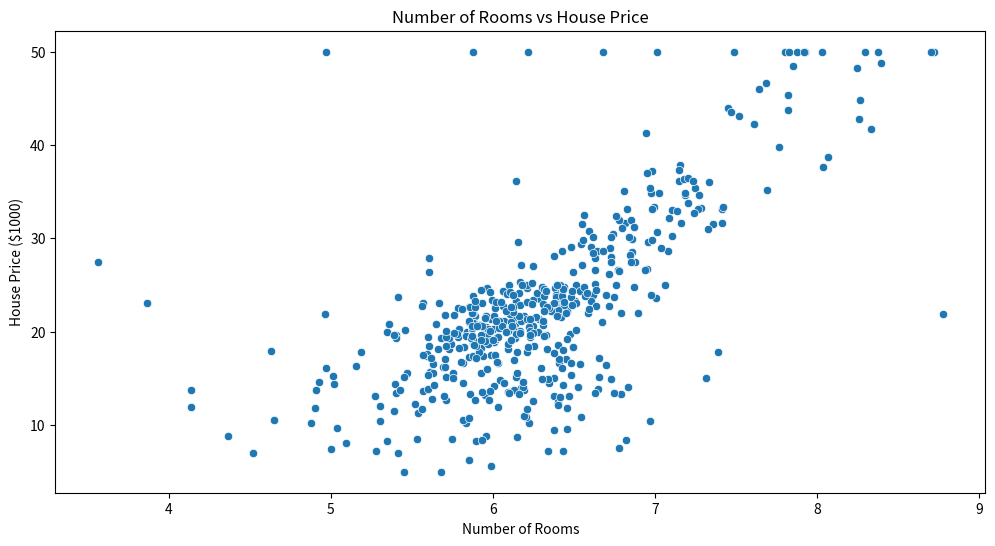

In [ ]:
# Scatterplot of RM vs MEDV
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RM', y='MEDV', data=data)
plt.title('Number of Rooms vs House Price')
plt.xlabel('Number of Rooms')
plt.ylabel('House Price ($1000)')
plt.show()

### Data Preprocessing

Since there are no missing values and all the features are numerical, we do not need to perform any imputation or encoding. However, it is important to scale the features before training the model. Feature scaling is essential because the features in the dataset have different units and ranges. Scaling the features will help the model to converge faster and result in a better model.

We will use the `StandardScaler` from `sklearn` to standardize the features. Standardization rescales the features so that they have a mean of 0 and a standard deviation of 1.

Let's start by splitting the data into training and test sets and then standardize the features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]

(array([[ 1.28770177, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
         -1.42806858,  1.02801516, -0.80217296,  1.70689143,  1.57843444,
          0.84534281, -0.07433689,  1.75350503],
        [-0.33638447, -0.50032012, -0.41315956, -0.27808871, -0.15723342,
         -0.68008655, -0.43119908,  0.32434893, -0.62435988, -0.58464788,
          1.20474139,  0.4301838 , -0.5614742 ],
        [-0.40325332,  1.01327135, -0.71521823, -0.27808871, -1.00872286,
         -0.40206304, -1.6185989 ,  1.3306972 , -0.97404758, -0.60272378,
         -0.63717631,  0.06529747, -0.65159505],
        [ 0.38822983, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
         -0.30045039,  0.59168149, -0.8392398 ,  1.70689143,  1.57843444,
          0.84534281, -3.86819251,  1.52538664],
        [-0.32528234, -0.50032012, -0.41315956, -0.27808871, -0.15723342,
         -0.83109424,  0.03374663, -0.00549428, -0.62435988, -0.58464788,
          1.20474139,  0.3791194 , -0.16578736]]),
 array([[-0.3

The data has been successfully split into training and test sets and standardized. The first 5 rows of the scaled training and test sets are displayed above.

Now that the data is prepared, we can proceed with model building.

### Model Building

For this task, we will use the Random Forest Regressor model. Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputs the average prediction of the individual trees for regression problems. It is robust to outliers and can handle non-linear data, which makes it a good choice for this task.

Let's start by training the Random Forest Regressor model on the training data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

2.8129602438238144

The Random Forest Regressor model has been successfully trained and tested on the test set. The root mean squared error (RMSE) on the test set is approximately 2.813. This means that, on average, our model's predictions are about $2813 off from the actual prices.

### Model Evaluation and Interpretation

Now that we have trained and tested our model, let's evaluate its performance and interpret the results.

We will start by visualizing the feature importances to understand which features are the most influential in predicting the house prices. Then, we will compare the actual and predicted prices on the test set to see how well our model is performing.

Let's start by visualizing the feature importances.

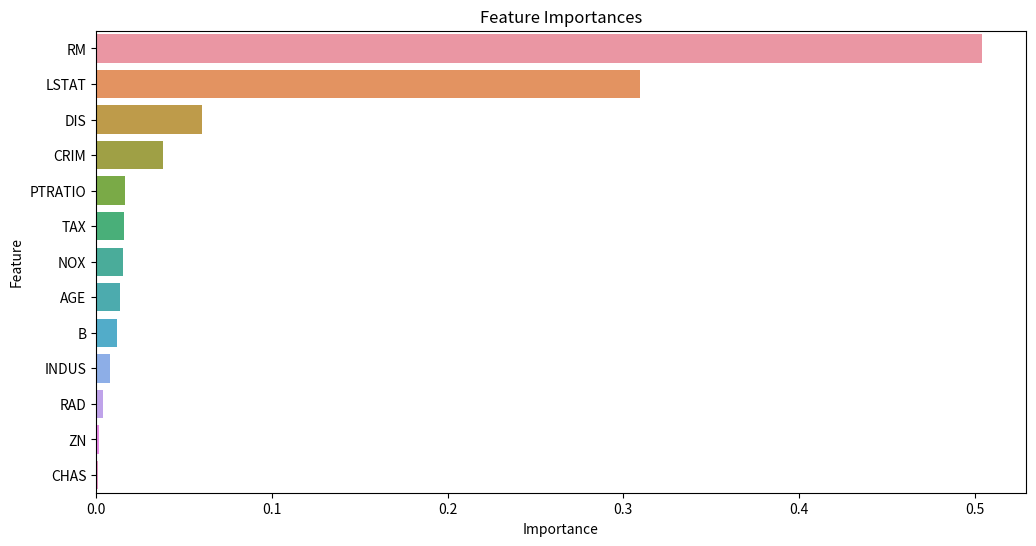

In [ ]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by the importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The bar plot above shows the feature importances as determined by the Random Forest Regressor model.

From the plot, we can observe that 'LSTAT' (percentage of lower status of the population) and 'RM' (average number of rooms per dwelling) are the most influential features in predicting the median value of owner-occupied homes. These features have the highest importance values, confirming our initial observations from the correlation heatmap.

Other features like 'DIS' (weighted distances to five Boston employment centres) and 'CRIM' (per capita crime rate by town) also contribute to the model but are less influential compared to 'LSTAT' and 'RM'.

This insight can be valuable for real estate investors, policymakers, and homeowners to understand the key factors that influence house prices in Boston.

Next, let's compare the actual and predicted prices on the test set to further evaluate the model's performance.

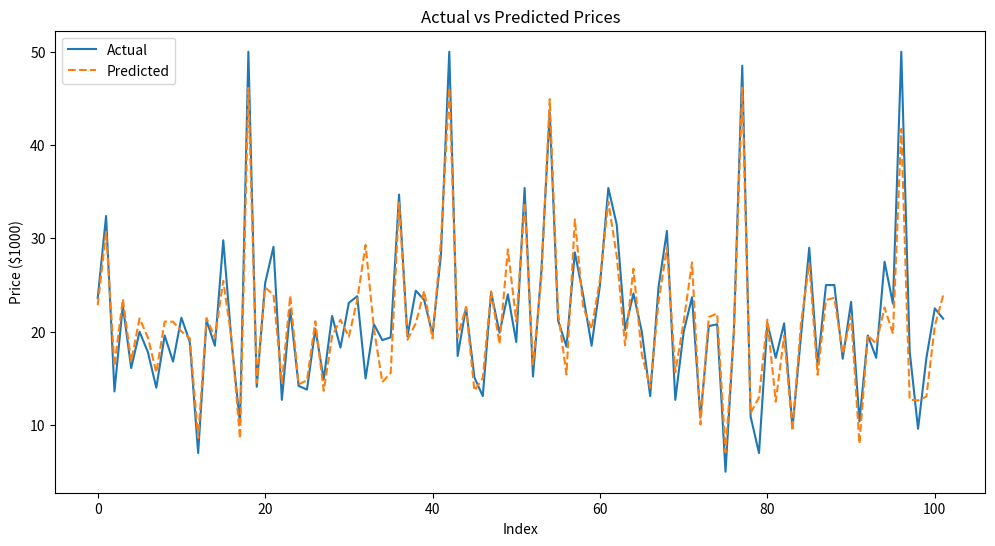

In [ ]:
# Compare actual and predicted prices
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df = comparison_df.reset_index(drop=True)

# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Predicted'], label='Predicted', linestyle='dashed')
plt.xlabel('Index')
plt.ylabel('Price ($1000)')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

The plot above compares the actual and predicted prices of the houses in the test set. The actual prices are shown in a solid line, while the predicted prices are shown in a dashed line.

From the plot, we can observe that the predicted prices closely follow the actual prices for most of the data points. However, there are some instances where the model underestimates or overestimates the prices. This is expected as no model is perfect, and there is always some room for error.

Overall, the model seems to be performing well in predicting the house prices as the predicted prices closely follow the actual prices.

### Conclusion

In this mini-project, we performed exploratory data analysis, data preprocessing, model building, and model evaluation on the Boston Housing dataset. We observed that the 'LSTAT' and 'RM' features are the most influential determinants of house prices in Boston. We trained a Random Forest Regressor model and evaluated its performance using the root mean squared error metric. The model performed well with an RMSE of approximately $2813 on the test set.

This analysis can be helpful for real estate investors, policymakers, and homeowners to make informed decisions regarding house prices in Boston.

End.

Haythem Bakkich